In [ ]:
import atomai as aoi

In [ ]:
print(aoi.__version__) #make sure the version is review

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Semantic segmentation

Download training/test data:

In [ ]:
images = np.load('data_out_pv/X_train.npy')
labels = np.load('data_out_pv/y_train.npy')

# Load train data 


In [ ]:
images_val = np.load('data_out_pv/X_val.npy')
labels_val = np.load('data_out_pv/y_val.npy')

# Load validation data 


In [ ]:
images_test = np.load('data_out_pv/X_test.npy')
labels_test = np.load('data_out_pv/y_test.npy')

# Load test data 

In [ ]:
print(images.shape, labels.shape)
print(images_val.shape, labels_val.shape)
print(images_test.shape, labels_test.shape)
# look at shape of images and labels(maps)

Let's plot some of the training data:

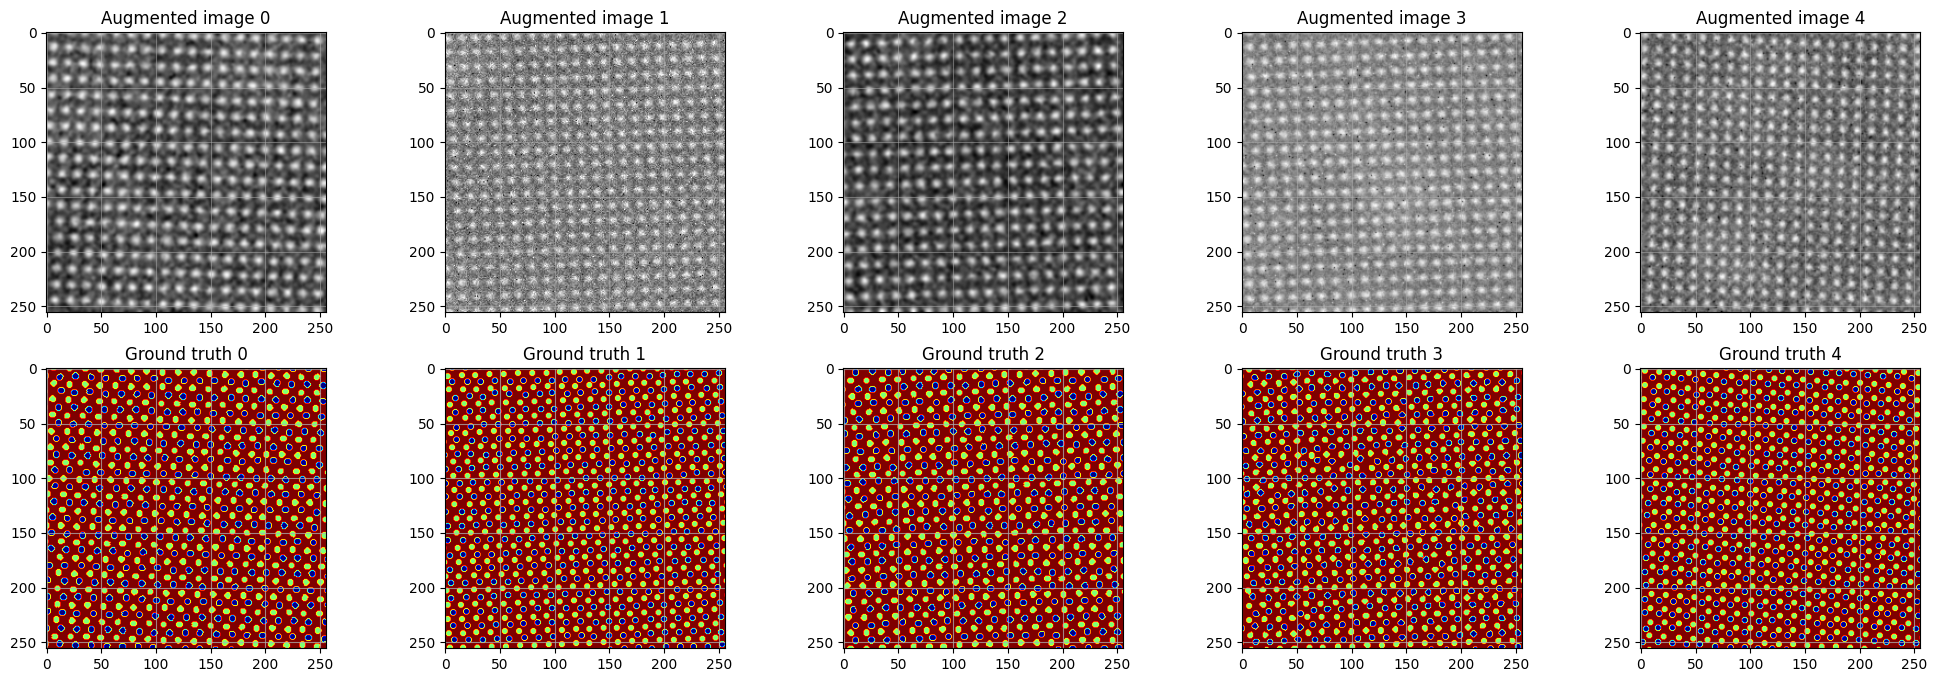

In [11]:
n = 5
k=1
n = n + 1
fig = plt.figure( figsize=(30, 8))
for i in range(1, n):   
    ax = fig.add_subplot(2, n, i)
    ax.imshow(images[i-1+k,0,:,:], cmap='gray')
    ax.set_title('Augmented image ' + str(i-1) )
    ax.grid(alpha = 0.5)
    ax = fig.add_subplot(2, n, i+n)
    if labels.shape[1] == 1:
        ax.imshow(labels[i-1+k, 0], cmap='jet', interpoltion='Gaussian')
    else:
        ax.imshow(labels[i-1+k], cmap='jet', interpolation='Gaussian')
                  
                  
    ax.set_title('Ground truth ' + str(i-1))
    ax.grid(alpha=0.75)

Initialize a nodel for semantic segmentation:

In [16]:
model = aoi.models.Segmentor(nb_classes=3) #load model with 3 classes 

In [17]:
print(model.net)

Unet(
  (c1): ConvBlock(
    (block): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (c2): ConvBlock(
    (block): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): LeakyReLU(negative_slope=0.01)
      (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (c3): ConvBlock(
    (block): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

Train the initialized model:

(Here the accuracy is calculated as [Intersection over Union](https://en.wikipedia.org/wiki/Jaccard_index) (IoU) score, which is the area of overlap between the predicted segmentation and the ground truth divided by the area of union between them)

## The model has multiple additional features:
- **auto_thresh (bool):
        Performs automatic binary threshold selection for optimal f1-score
- **ES (bool):
        Early stopping mode on/off
- **patience (int):
         patience for early stopping
- **tolerance (float):
         tolerance for early stopping
- **weight_decay (float):
          weight decay for model 

Epoch 1/3000 ... Training loss: 1.2643 ... Test loss: 1.2214 ... Train Accuracy: 0.0925 ... Test Accuracy: 0.0322 ... GPU memory usage: 8357/20470
Updating Early stopping model @ epoch:  1
Updating Early stopping model @ epoch:  8
Updating Early stopping model @ epoch:  9
Updating Early stopping model @ epoch:  10
Updating Early stopping model @ epoch:  11
Updating Early stopping model @ epoch:  12
Updating Early stopping model @ epoch:  13
Updating Early stopping model @ epoch:  14
Updating Early stopping model @ epoch:  15
Updating Early stopping model @ epoch:  16
Updating Early stopping model @ epoch:  17
Updating Early stopping model @ epoch:  18
Updating Early stopping model @ epoch:  19
Updating Early stopping model @ epoch:  20
Updating Early stopping model @ epoch:  22
Updating Early stopping model @ epoch:  23
Updating Early stopping model @ epoch:  24
Updating Early stopping model @ epoch:  25
Updating Early stopping model @ epoch:  26
Updating Early stopping model @ epoch: 

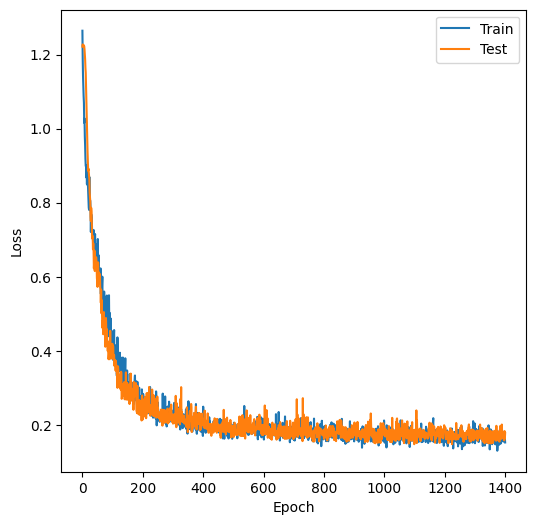

In [18]:
#set auto_thresh +false, as only currently implemented for binary case
model.fit(images, labels, images_val, labels_val, # training data
          training_cycles=3000, compute_accuracy=True, batch_size=16, swa=False, filename='ES_reg',
          patience=300,tolerance=1e-4,verbose=True,auto_thresh=False)

# predictions

In [ ]:
model=aoi.load_model('ES_reg_metadict_final.tar')#can load the model from saved file

In [19]:
pred=model.predict(images_test) #user can provide threshold as well

Batch 787/787
787 images were decoded in approximately 4.4537 seconds
